In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)?

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


        
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-the-success-of-bank-telemarketing/sample_submission.csv
/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv
/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv


In [2]:
pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/sample_submission.csv')

id target
0        0     no
1        1     no
2        2     no
3        3    yes
4        4    yes
...    ...    ...
9995  9995    yes
9996  9996     no
9997  9997     no
9998  9998     no
9999  9999     no

[10000 rows x 2 columns]

# Data Loading

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.pandas.set_option("display.max_columns", None)

df=pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv")

In [4]:
X_train=df.drop("target", axis=1)
y_train=df['target']
X_test = pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv")
X_test.fillna("unknown", inplace=True)

# Baseline Model
For a baseline model we'd use the `DummyClassifier` that would only predict the most frequent class found in `y_train_cleaned`

In [5]:
# Dummy/Baseline Model
from sklearn.dummy import DummyClassifier
dummy_model = DummyClassifier(strategy='prior', random_state=42)
dummy_model.fit(X_train, y_train)

# Submision
y_pred = dummy_model.predict(X_test)
submission = pd.DataFrame({"id": range(0, X_test.shape[0]),
                          "target":y_pred})
submission.to_csv('submission.csv', index=False)

# Exploratory Data Ananlysis (EDA)

## Type of Data

Result:  
> Total : 16 columns  
> Object(10 Columns) :  **['last contact date', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome', 'target']**  
> Int64(6 Columns)  :  **['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']**  


In [6]:
df.shape

(39211, 16)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   last contact date  39211 non-null  object
 1   age                39211 non-null  int64 
 2   job                38982 non-null  object
 3   marital            39211 non-null  object
 4   education          37744 non-null  object
 5   default            39211 non-null  object
 6   balance            39211 non-null  int64 
 7   housing            39211 non-null  object
 8   loan               39211 non-null  object
 9   contact            28875 non-null  object
 10  duration           39211 non-null  int64 
 11  campaign           39211 non-null  int64 
 12  pdays              39211 non-null  int64 
 13  previous           39211 non-null  int64 
 14  poutcome           9760 non-null   object
 15  target             39211 non-null  object
dtypes: int64(6), object(10)
memory usage: 4.

In [8]:
print("Object : ", list(df.select_dtypes(include='object').columns))  # 10
print("Int64  : ", list(df.select_dtypes(exclude='object').columns))  # 6

Object :  ['last contact date', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome', 'target']
Int64  :  ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']


# Checking for Null Values

In [9]:
df.isna().sum()

last contact date        0
age                      0
job                    229
marital                  0
education             1467
default                  0
balance                  0
housing                  0
loan                     0
contact              10336
duration                 0
campaign                 0
pdays                    0
previous                 0
poutcome             29451
target                   0
dtype: int64

In [10]:
#filling null values with unknown 
df.fillna("unknown", inplace=True)

## Numerical Data Statistical Summary

### * Numeric Ranges

**['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']**   
  
  - -------[Min, Max] mean
       
  - age : **18 to 95** [42.12 years]
  - balance: **-8019 to 102127** [5441euro/annum] (in Euros/annum) 
  - duration: **0 to 4918** [439sec] (in Secs lastContactDuration)
     
  - campaign: **1 to 63** (counts)
  - pdays: **-1 to 871** (counts, -1 means not contacted till now)
  - previous: **0 to 275** (counts)

In [11]:
df.describe()

age        balance      duration      campaign         pdays  \
count  39211.000000   39211.000000  39211.000000  39211.000000  39211.000000   
mean      42.120247    5441.781719    439.062789      5.108770     72.256051   
std       12.709352   16365.292065    769.096291      9.890153    160.942593   
min       18.000000   -8019.000000      0.000000      1.000000     -1.000000   
25%       33.000000      98.000000    109.000000      1.000000     -1.000000   
50%       40.000000     549.000000    197.000000      2.000000     -1.000000   
75%       50.000000    2030.000000    380.000000      4.000000     -1.000000   
max       95.000000  102127.000000   4918.000000     63.000000    871.000000   

           previous  
count  39211.000000  
mean      11.826171  
std       44.140259  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max      275.000000

## Categorical Data Statistical Summary

**Result:**

Nan Value Columns: job, education, contact, poutcome   
Highly Imbalance CategoricalColumns: 
    - Education: (primary, secondary, tertiary, nan) --> (16, 50, 30, 3)

In [12]:
for col in ['last contact date', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome', 'target']:
    print(col, ': ', df[col].unique())

last contact date :  ['2009-04-17' '2009-10-11' '2010-11-20' ... '2009-07-05' '2008-02-25'
 '2010-04-12']
job :  ['blue-collar' 'technician' 'admin.' 'entrepreneur' 'unemployed'
 'management' 'services' 'student' 'self-employed' 'retired' 'housemaid'
 'unknown']
marital :  ['married' 'single' 'divorced']
education :  ['secondary' 'tertiary' 'primary' 'unknown']
default :  ['no' 'yes']
housing :  ['yes' 'no']
loan :  ['no' 'yes']
contact :  ['cellular' 'telephone' 'unknown']
poutcome :  ['other' 'unknown' 'failure' 'success']
target :  ['no' 'yes']


# Target variable analysis 

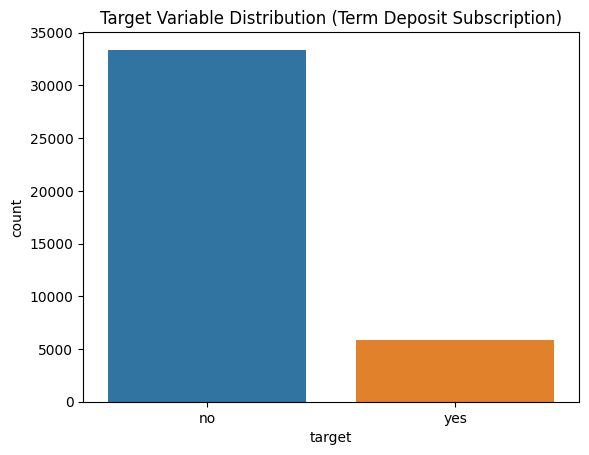

Target variable distribution:
 target
no     85.139374
yes    14.860626
Name: proportion, dtype: float64


In [13]:
# Count plot for the target variable
sns.countplot(x='target', data=df)
plt.title('Target Variable Distribution (Term Deposit Subscription)')
plt.show()

# Percentage distribution of target variable
target_dist = df['target'].value_counts(normalize=True) * 100
print("Target variable distribution:\n", target_dist)


**Analysis**

The image shows a bar chart representing the distribution of the target variable for term deposit subscription. The distribution indicates that around 85.13% of the data points fall under the "no" category, meaning they did not subscribe to the term deposit, while approximately 14.86% fall under the "yes" category, indicating a subscription. This suggests a class imbalance in the data, with more customers not subscribing to the term deposit compared to those who did.

# Univariate Analysis


**Categorical Columns**

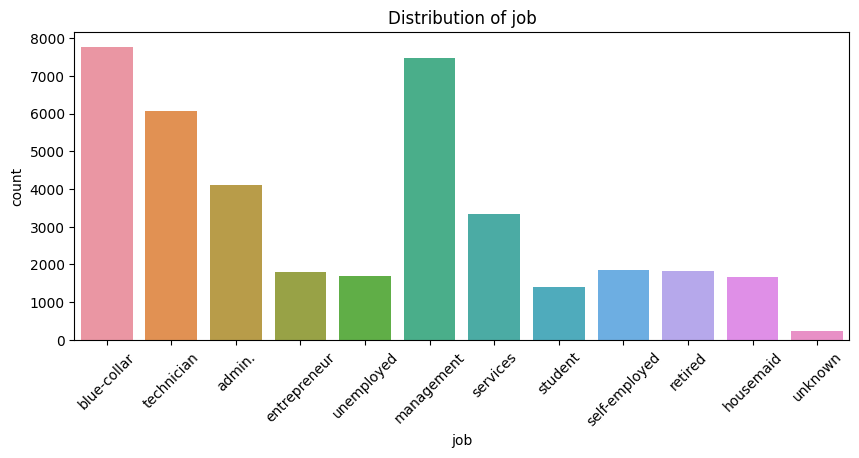

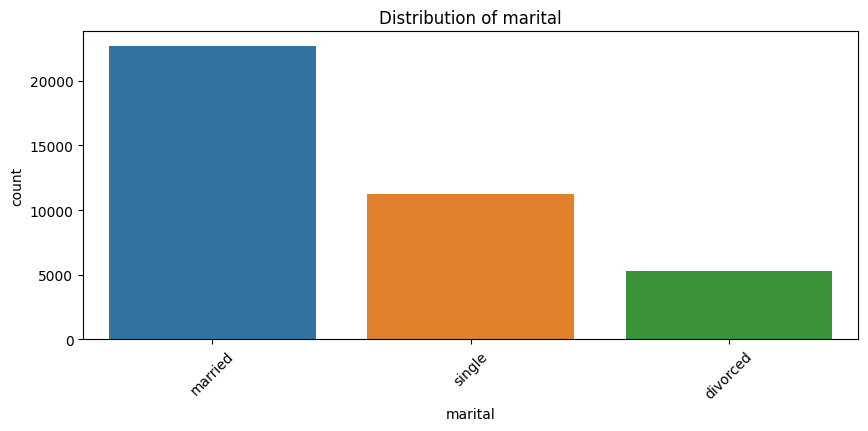

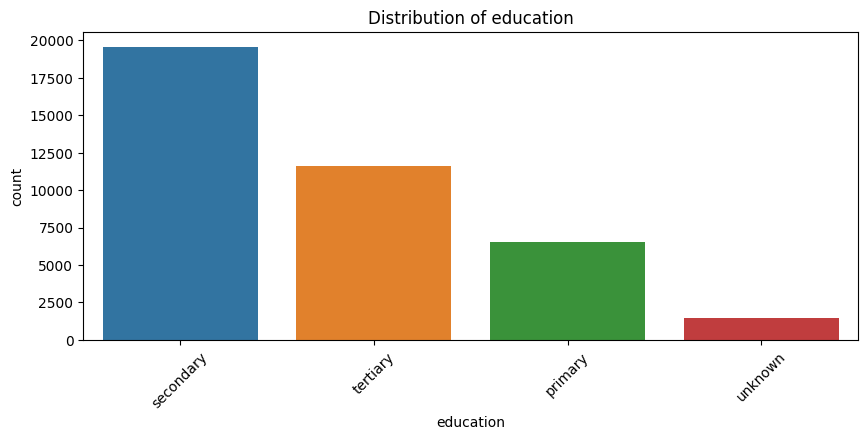

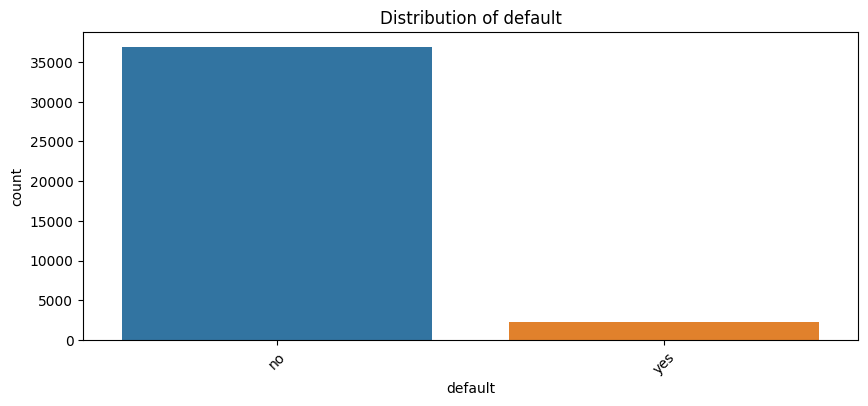

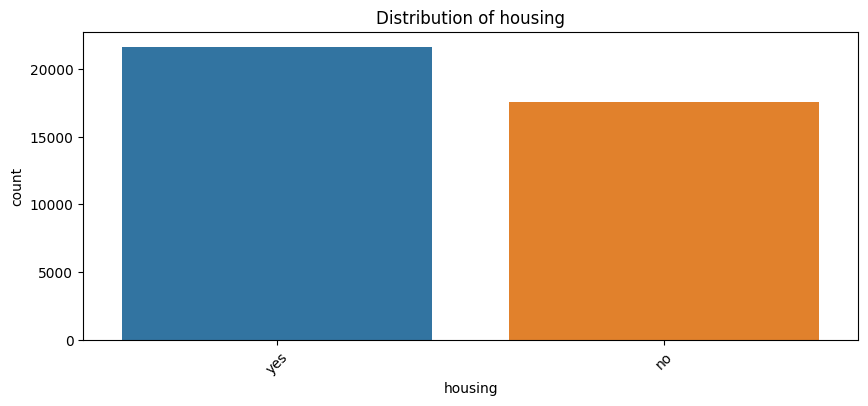

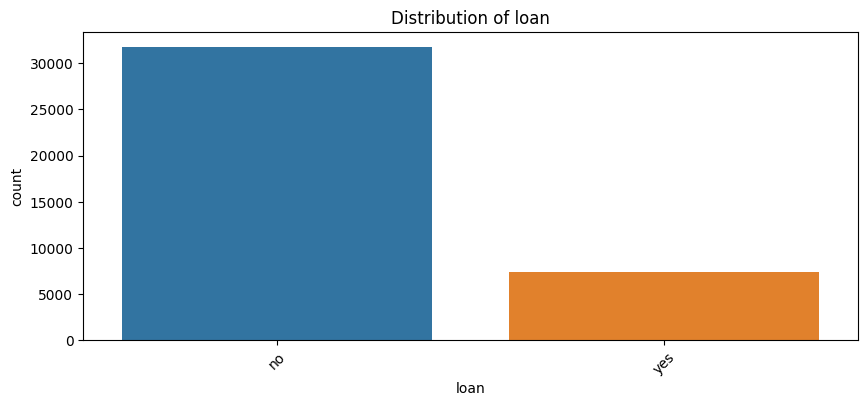

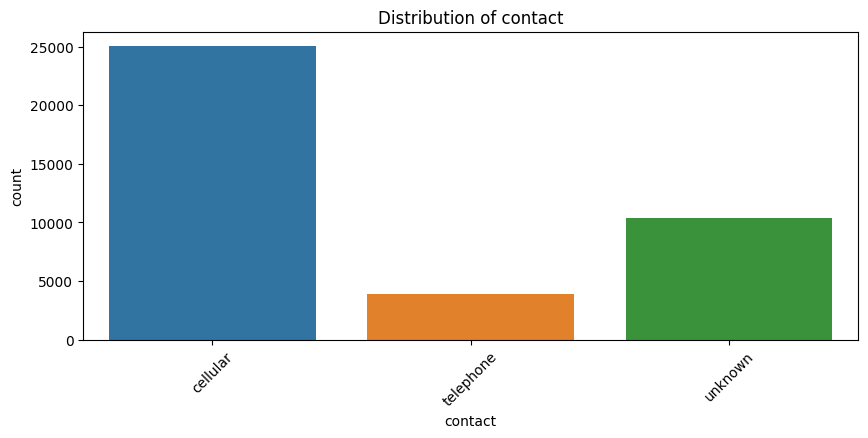

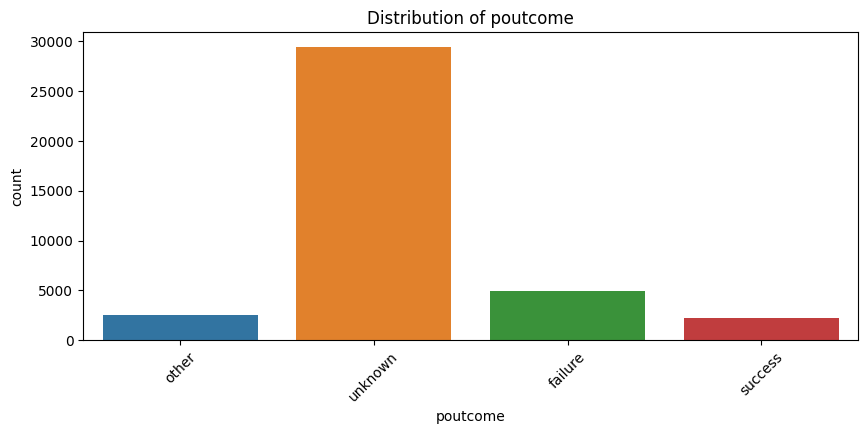

In [14]:
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']

for col in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


**Analysis**

Job Categories: Management and blue-collar jobs dominate, while housemaid and retired roles are underrepresented.
Marital Status: Most individuals are married, with fewer being single or divorced.
Education: Secondary education is the most common, followed by tertiary and primary.
Default Status: Most individuals have no default history, indicating good financial behavior.
Housing Loans: A majority of individuals have housing loans.
Personal Loans: Most individuals do not have personal loans.
Contact Method: Cellular is the primary contact method, with less reliance on telephone.

**Numerical Columns**

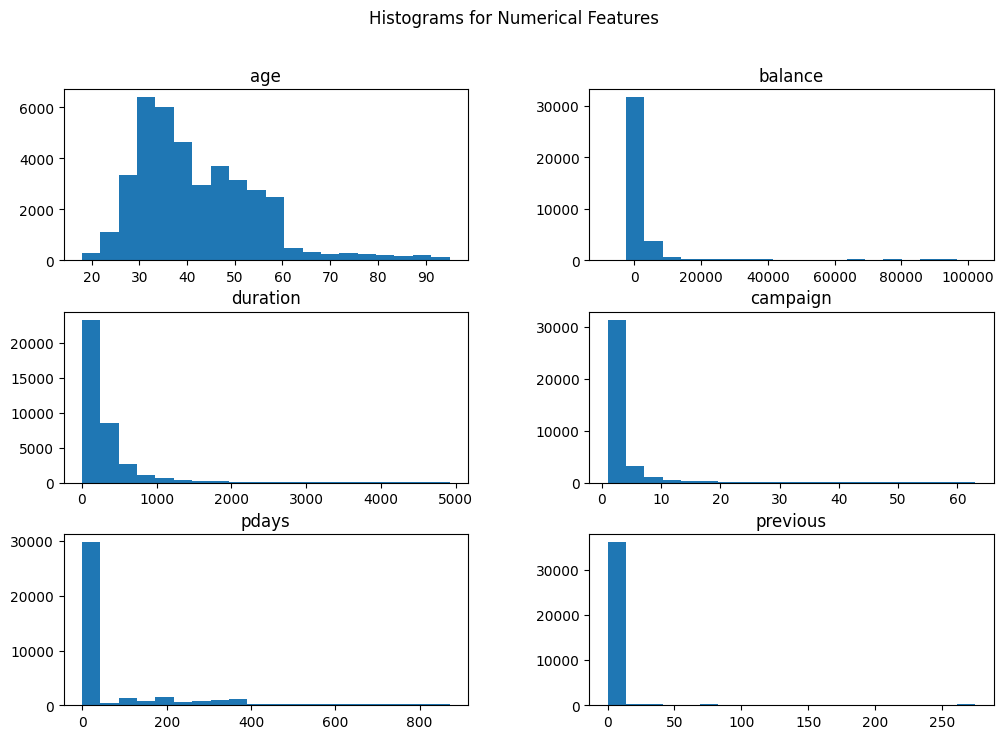

In [15]:
numerical_columns = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

# Plot histograms for numerical columns
df[numerical_columns].hist(figsize=(12, 8), bins=20, grid=False)
plt.suptitle('Histograms for Numerical Features')
plt.show() 



**Analysis**

Age: Most customers are aged between 25 and 50.
Average Yearly Balance: The majority have a balance of less than 8,000 euros.
Last Call Duration: Most calls are either non-existent or under 500 seconds.
Pdays: Most customers were last contacted fewer than 400 days ago.

# Bivariate Analysis

**Categorical Columns vs Target**

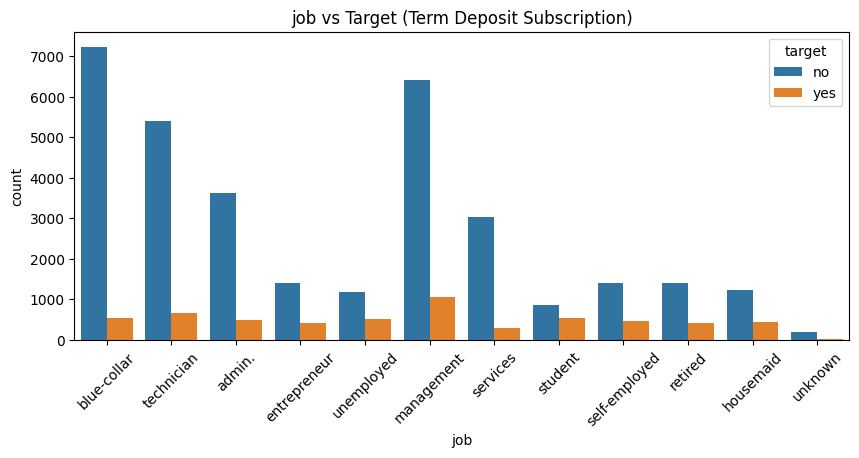

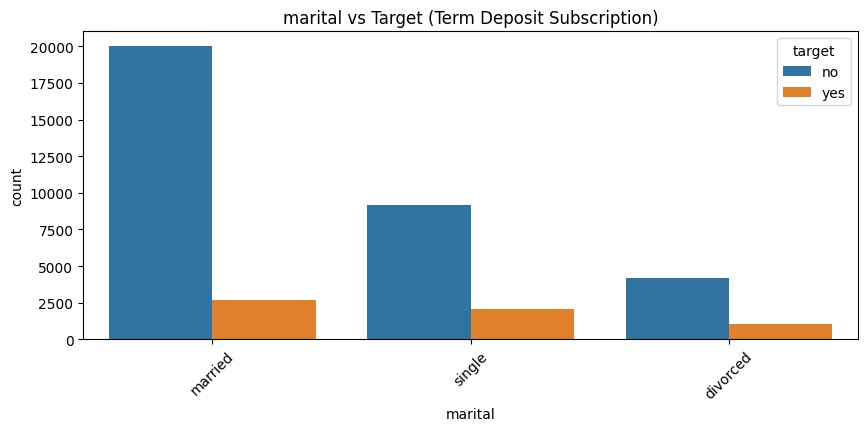

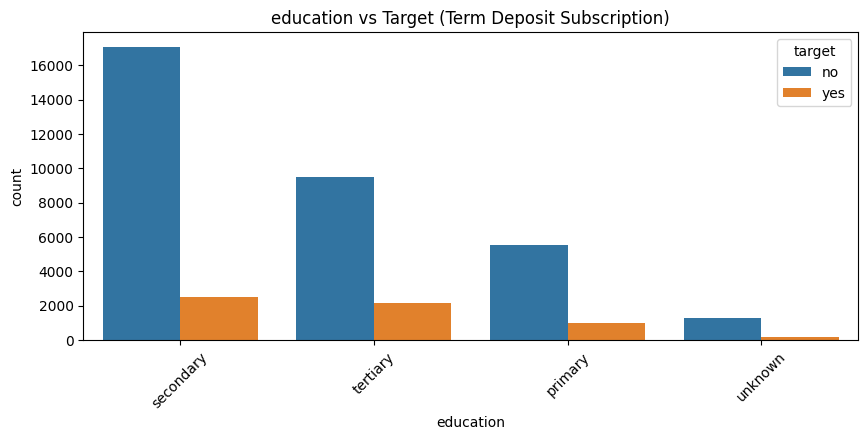

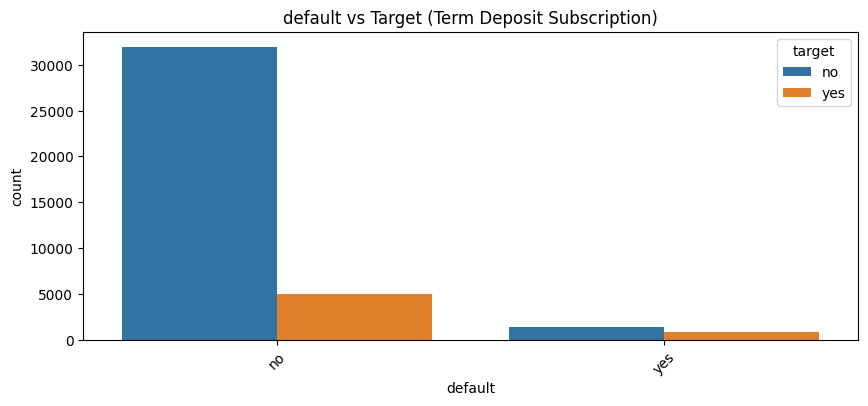

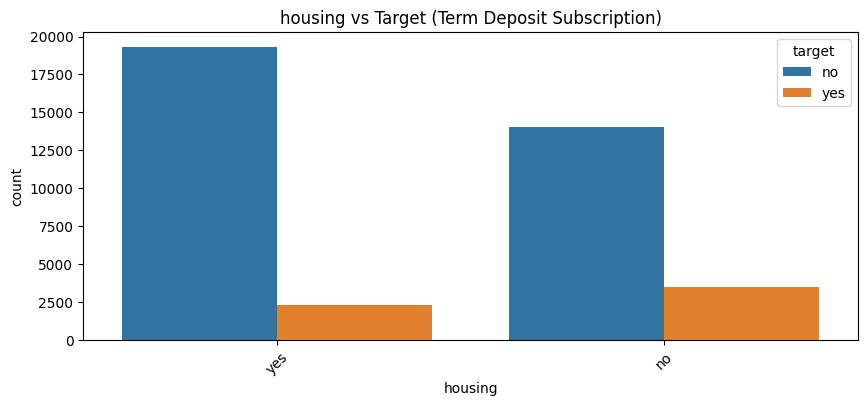

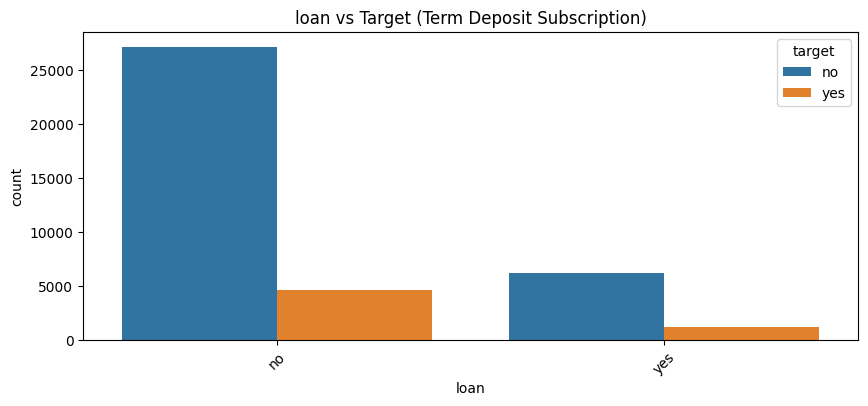

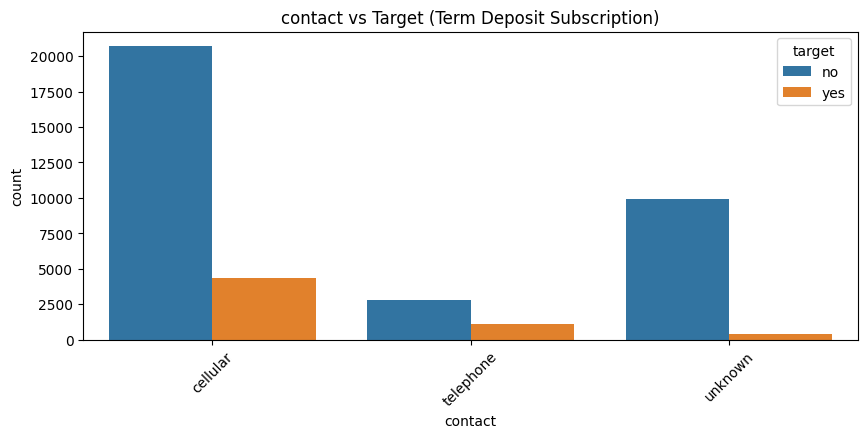

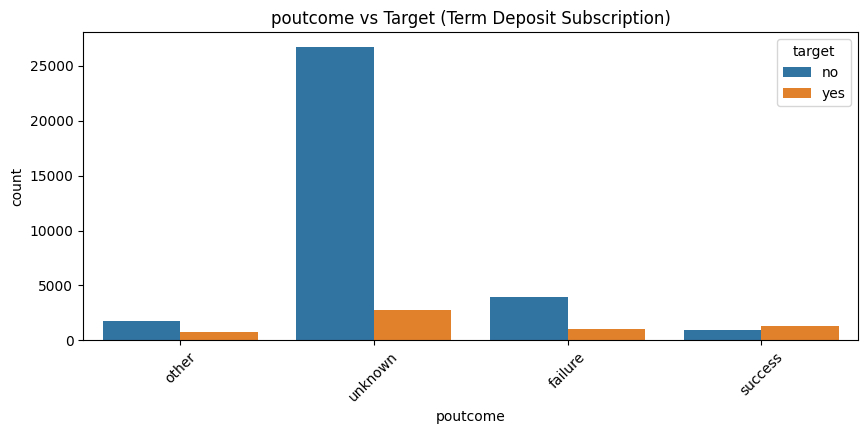

In [16]:
for col in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, hue='target', data=df)
    plt.title(f'{col} vs Target (Term Deposit Subscription)')
    plt.xticks(rotation=45)
    plt.show()


**Analysis**

Job Category: Unemployed, students, housemaids, retirees, and self-employed individuals have a higher proportion of term deposit subscriptions compared to management and blue-collar employees.
Marital Status: Divorced clients are more likely to subscribe to term deposits compared to those who are married or single.
Education: Clients with primary or tertiary education are more likely to subscribe to term deposits than those with secondary education.
Credit in Default: Clients with credit in default are more likely to subscribe to term deposits than those without credit in default.
Housing Loan: Clients without housing loans are more likely to subscribe to term deposits than those with housing loans.
Personal Loan: Clients with personal loans are more likely to subscribe to term deposits than those without personal loans.
Contact Type: Clients using telephone contact are more likely to subscribe to term deposits than those using cellular contact.
Previous Marketing Campaign: Clients who subscribed in the previous marketing campaign are more likely to subscribe to term deposits again.

**Numerical Columns vs Target**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

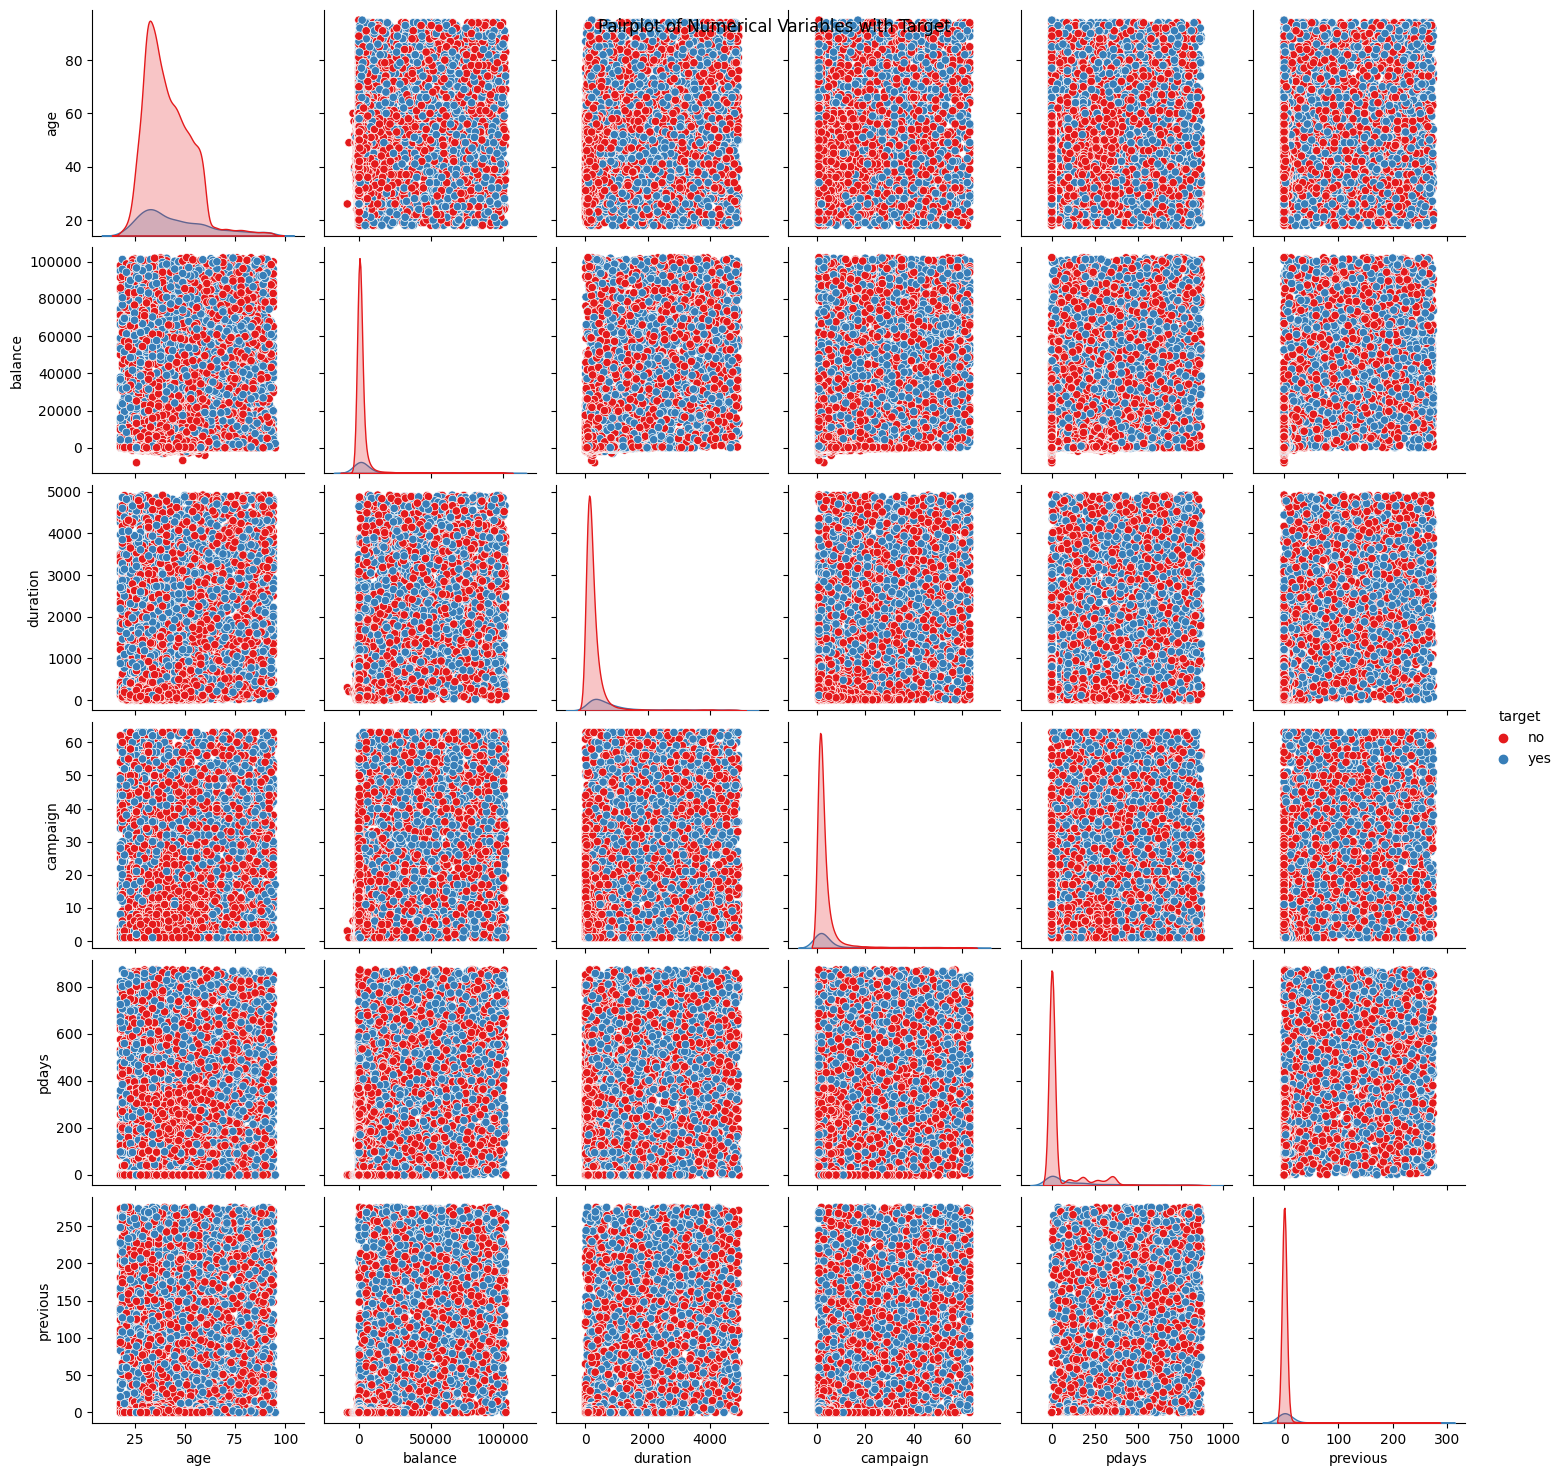

In [17]:
 # Pairplot for numerical variables based on the target
sns.pairplot(df[numerical_columns + ['target']], hue='target', palette='Set1')
plt.suptitle('Pairplot of Numerical Variables with Target')
plt.show()

# Multivariate Analysis

****

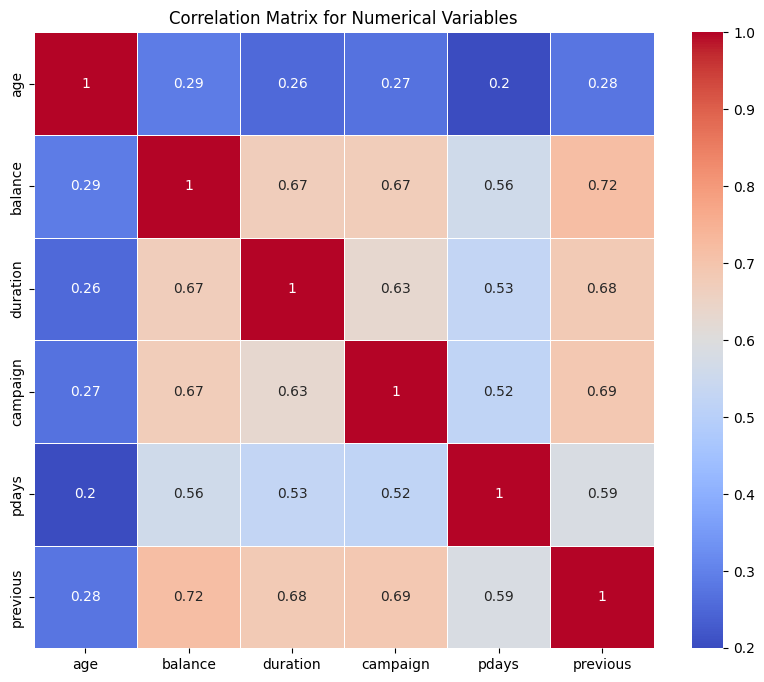

In [18]:
# Correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = df[numerical_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Numerical Variables')
plt.show()



**Analysis**

The correlation matrix shows that "previous" and "campaign" have the highest correlation (0.66), while "age" and "pdays" have the lowest correlation (0.17), indicating weak relationships between most of the numeric variables in this dataset.

# Distribution Analysis

**Result**
**    Each Numerical variable is highly positively/right skewed**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

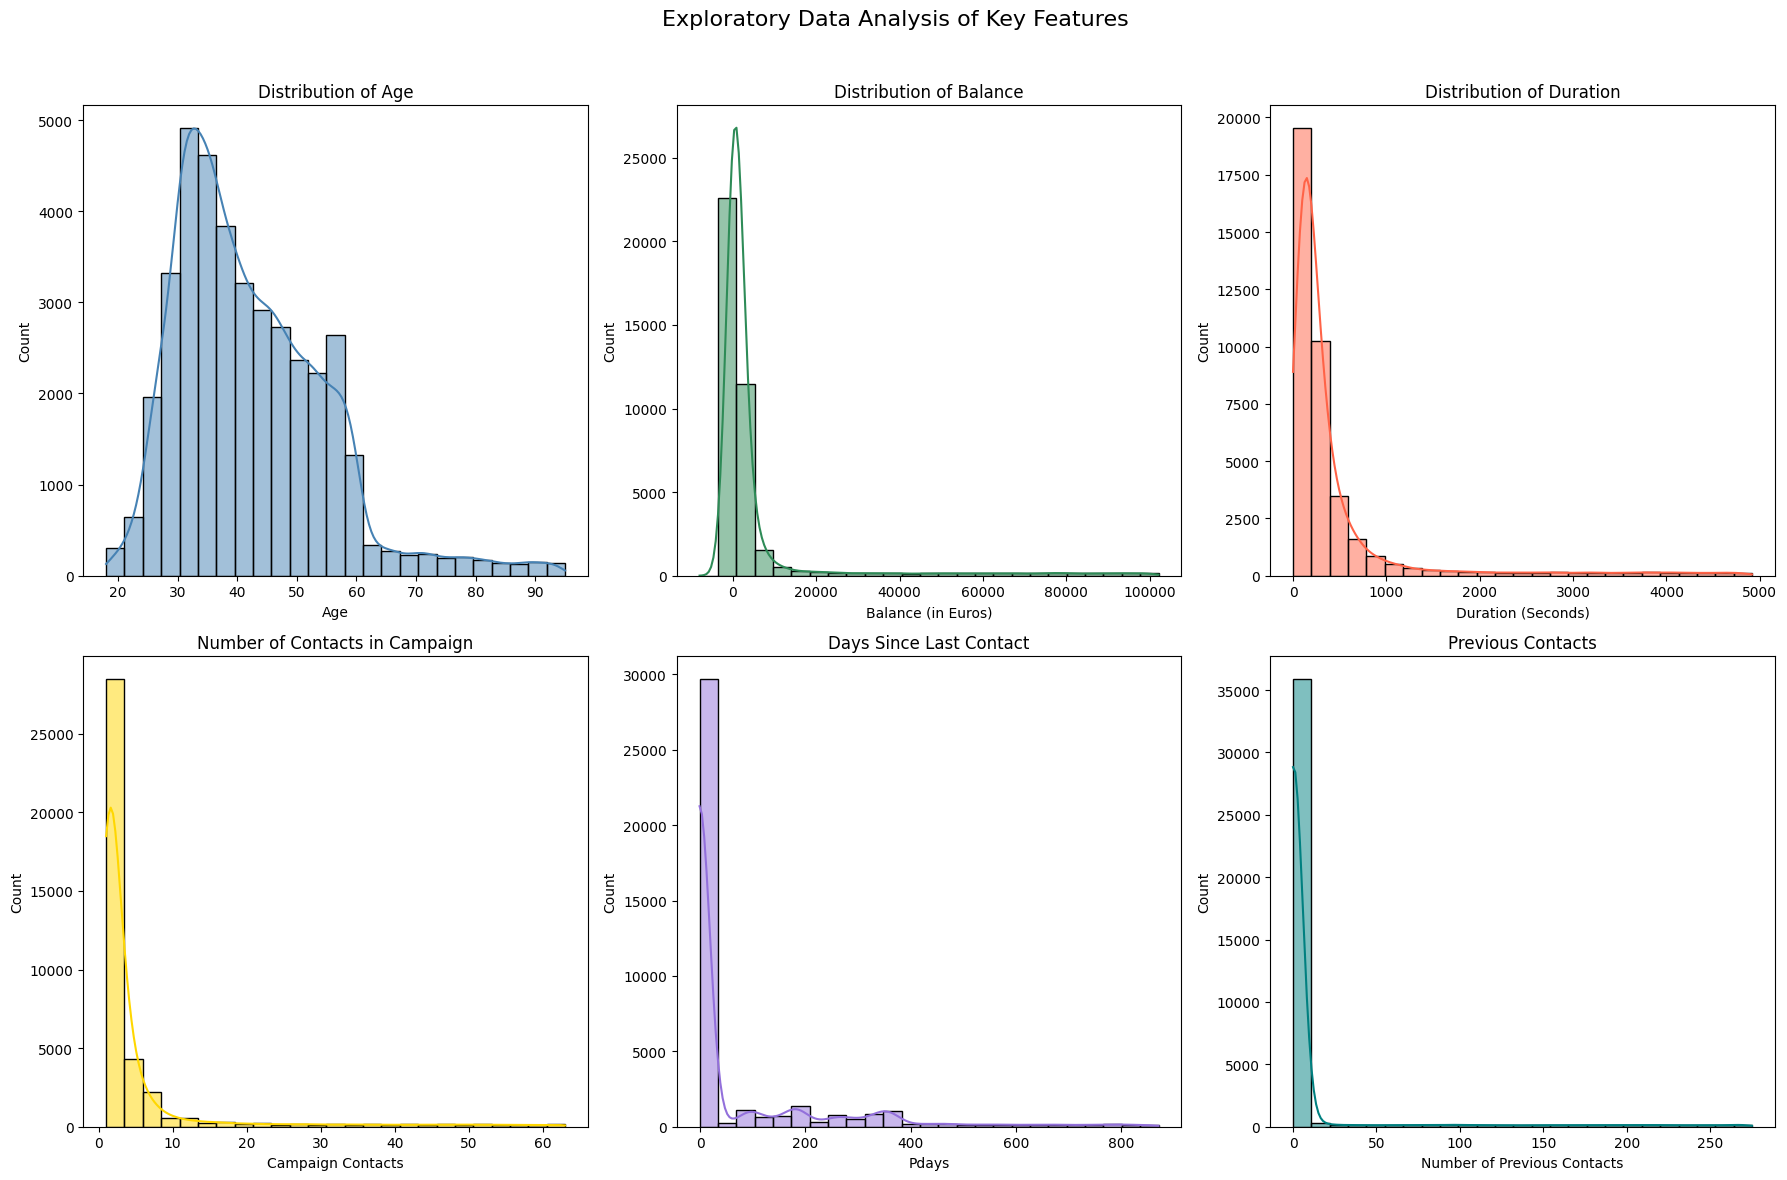

In [19]:
# Set up the plotting canvas
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle("Exploratory Data Analysis of Key Features", fontsize=16)

# Plot 1: Age Distribution
sns.histplot(data=df, x='age', bins=25, kde=True, color='steelblue', ax=axes[0, 0])
axes[0, 0].set_title("Distribution of Age")
axes[0, 0].set_xlabel("Age")
axes[0, 0].set_ylabel("Count")

# Plot 2: Balance Distribution
sns.histplot(data=df, x='balance', bins=25, kde=True, color='seagreen', ax=axes[0, 1])
axes[0, 1].set_title("Distribution of Balance")
axes[0, 1].set_xlabel("Balance (in Euros)")
axes[0, 1].set_ylabel("Count")

# Plot 3: Duration Distribution
sns.histplot(data=df, x='duration', bins=25, kde=True, color='tomato', ax=axes[0, 2])
axes[0, 2].set_title("Distribution of Duration")
axes[0, 2].set_xlabel("Duration (Seconds)")
axes[0, 2].set_ylabel("Count")

# Plot 4: Campaign Distribution
sns.histplot(data=df, x='campaign', bins=25, kde=True, color='gold', ax=axes[1, 0])
axes[1, 0].set_title("Number of Contacts in Campaign")
axes[1, 0].set_xlabel("Campaign Contacts")
axes[1, 0].set_ylabel("Count")

# Plot 5: Pdays Distribution
sns.histplot(data=df, x='pdays', bins=25, kde=True, color='mediumpurple', ax=axes[1, 1])
axes[1, 1].set_title("Days Since Last Contact")
axes[1, 1].set_xlabel("Pdays")
axes[1, 1].set_ylabel("Count")

# Plot 6: Previous Distribution
sns.histplot(data=df, x='previous', bins=25, kde=True, color='teal', ax=axes[1, 2])
axes[1, 2].set_title("Previous Contacts")
axes[1, 2].set_xlabel("Number of Previous Contacts")
axes[1, 2].set_ylabel("Count")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust for the suptitle
plt.show()


## Imbalance Dataset Checking

In [20]:
import pandas as pd
from scipy.stats import chisquare

count = df['target'].value_counts()
observed = count.values  # [counts Yes and No]

totle = observed.sum()
expected = [totle / 2, totle / 2]

#Chi-Square Goodness of Fit test
chi2_statistic, p_val = chisquare(f_obs=observed, f_exp=expected)

#Results
print(f"Chi-Square Statistic: {chi2_statistic}")
print(f"P-Value: {p_val}")

# Interpretation
if p_val < 0.05:
    print("The column is imbalanced (reject null hypothesis).")
else:
    print("The column is not imbalanced (do not reject null hypothesis).")


Chi-Square Statistic: 19366.714671903293
P-Value: 0.0
The column is imbalanced (reject null hypothesis).


In [21]:
from statsmodels.stats.proportion import proportions_ztest

# Define counts and sample size
count_of_yes = 5827  
total_counts = 33384 + 5827 

# Perform Z-test for proportions
statistic, p_val = proportions_ztest(count_of_yes, total_counts, value=0.5, alternative='two-sided')

print(f"Z-Statistic = {statistic}, P-value = {p_val}")

# Interpretation
if p_val < 0.05:
    print("Reject the Null Hypothesis: The target proportions are imbalanced.")
else:
    print("Do not Reject the Null Hypothesis: The target proportions are not imbalanced.")


Z-Statistic = -195.62042801545712, P-value = 0.0
Reject the Null Hypothesis: The target proportions are imbalanced.


# EDA RESULTS
## Numerical Columns (**Scaling & FeatureEngineering required**)
> ##### Has diversed values and +vely skewed, hence need to scaled
> ##### **balance** --> need to be made +ve, as many values are -ve.
## Categorical Columns (**Imputation & Encoding required**)
> ##### **poutcome** --> column need to be removed, 75% mission data
> ##### **job education contact** --> column need to be imputed
> ##### **default housing loan** need to be binary encoded, **yes no**
> ##### **job contact** need to be one hot encoded, **nominal data**
> ##### **marital education** need to be ordinal encoded

## Data Preprocessing

In [22]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [23]:
X_train=df.drop("target", axis=1)
y_train=df['target']
X_test = pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv")
X_test.fillna("unknown", inplace=True)

**`Last Contact Date` should be datetime**

In [24]:
class DatetimeColumn(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self

  def transform(self, X):
    X["last contact date"] = pd.to_datetime(X["last contact date"]).map(pd.Timestamp.toordinal)
    return X

**Admin in "job" column has a '.' after admin so replacing the "." with ""**

In [25]:
class JobColumnCleaner(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self

  def transform(self, X):
    X["job"] = X["job"].str.replace(".", "")
    return X

**`Deafult`, `Housing` and `Loan` should contain binary data**


In [26]:
class BinaryEncoding(BaseEstimator, TransformerMixin):
  columns_to_encode = ["default", "housing", "loan"]

  def fit(self, X, y=None):
    return self

  def transform(self, X):
    X[self.columns_to_encode] = self.encode(X[self.columns_to_encode])
    return X

  def encode(self, columns):
    return columns.map(lambda y: 1 if y == "yes" else 0)

  def decode(self, columns):
    return columns.map(lambda y: "yes" if y == 1 else "no")

**`Job` and `Contact` column should contain nominal data**

In [27]:

class EncodingNominalColumns(BaseEstimator, TransformerMixin):
  columns_to_encode = ["job","contact"]

  def fit(self, X, y=None):
    return self

  def transform(self, X):
    for columns in self.columns_to_encode:
      dummy_columns = pd.get_dummies(X[columns], prefix=columns, drop_first=True).astype(int)
      X = pd.concat([X, dummy_columns], axis=1)
      X.drop(columns, axis=1, inplace=True)
    return X

**`Marital`, `Education` and `Poutcome` column should contain ordinal data**

In [28]:
class EncodingLabelColumns(BaseEstimator, TransformerMixin):
  custom_maps = {
    "marital": {"single": 0, "married": 1, "divorced": 2},
    "education": {"unknown": -1, "primary": 1, "secondary": 2, "tertiary": 3},
    "poutcome": {"unknown": -1, "failure": 0, "success": 1, "other": 2},
  }
  def fit(self, X, y=None):
    return self

  def transform(self, X):

    for columns, maping in self.custom_maps.items():
      if columns in X.columns:
        X[columns] = X[columns].map(maping)
    return X

In [29]:
# X_train['balance'] = X_train['balance'].replace("<0", 0)
# X_test['balance'] = X_test['balance'].replace("<0", 0)
# # Replace 'unknown' with the most frequent value in the 'job' column
# X_train['job'] = X_train['job'].replace("unknown", X_train['job'].mode()[0])
# X_train['education'] = X_train['education'].replace("unknown", X_train['education'].mode()[0])
# X_train['poutcome']=X_train['poutcome'].replace("unknown", X_train['poutcome'].mode()[0])


**Putting everything in `Pipeline`**

In [30]:
from sklearn.pipeline import Pipeline

preprocessing_pipeline = Pipeline([
    ("to_datetime", DatetimeColumn()),
    ("job_cleaner", JobColumnCleaner()),
    ("encode_binary_columns", BinaryEncoding()),
    ("encode_nominal_columns", EncodingNominalColumns()),
    ("label_encode_columns", (EncodingLabelColumns()))
])

X_train_cleaned = preprocessing_pipeline.fit_transform(X_train)
X_test_cleaned = preprocessing_pipeline.transform(X_test)

**Encoding the target variable**

In [31]:
y_train_cleaned = BinaryEncoding().encode(y_train)

**`Scaling` and `Dimensionality Reduction`**

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

class ReducingDimensions(BaseEstimator, TransformerMixin):
  def fit(self, X):
    return self

  def transform(self, X, y=None):
    scalerfunc = StandardScaler()
    X_scaled = scalerfunc.fit_transform(X)
    pca = PCA(n_components=0.95)
    X_pca = pca.fit_transform(X_scaled)
    X_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
    return X_pca

In [33]:
data_cleanig_pipeline = Pipeline([
    ("preprocessing", preprocessing_pipeline),
    ("reduce_dimensions", ReducingDimensions())
])

X_train_reduced = data_cleanig_pipeline.fit_transform(X_train)
X_test_reduced = data_cleanig_pipeline.transform(X_test)

**Handling Imbalnce in the the traing data**

In [34]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_reduced, y_train_cleaned)

# Fitting Models
**Model-1 Logistic Regression** 

In [35]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import GridSearchCV
# from IPython.utils.io import capture_output

# # Define the parameter grid for hyperparameter tuning
# param_grid = {
#     'solver': ['newton-cg', 'lbfgs', 'saga','sag'],  # Available solvers
#     'penalty': ['l2', 'none'],  # Regularization techniques
#     'C': [0.5, 1, 10],  # Inverse of regularization strength
#     'tol': [0.001,0.0001],  # Handle imbalanced data
#     'max_iter': [1000, 5000]  # Iteration limits
# }

# # Initialize the LogisticRegression model
# lr = LogisticRegression(random_state=42)

# # Use GridSearchCV to search for the best parameters
# grid_search = GridSearchCV(
#     estimator=lr,
#     param_grid=param_grid,
#     scoring='accuracy',  # Or other metrics such as 'f1', 'roc_auc'
#     cv=5,  # 5-fold cross-validation
#     n_jobs=-1,  # Use all available cores
#     verbose=2
# )

# # Fit the GridSearchCV
# with capture_output() as captured:
#     grid_search.fit(X_train_cleaned, y_train_cleaned)
#     # Best parameters and model
#     print("Best Parameters:", grid_search.best_params_)
#     best_model = grid_search.best_estimator_

# # Evaluate the best model on the test set
# train_accuracy = best_model.score(X_train_cleaned, y_train_cleaned)
# print("Train Accuracy:", train_accuracy)
# # Best Parameters: {'C': 0.5, 'penalty': None, 'solver': 'newton-cg', 'tol': 0.001, 'max_iter': 10000}


In [36]:
lr = LogisticRegression(penalty=None, solver='newton-cg',
                        tol=0.001,
                        max_iter=10000, random_state=42)
lr.fit(X_train_reduced, y_train_cleaned)
#Probability
y_probability_prediction = lr.predict_proba(X_train_reduced)[:, 1]
threshold_value = 0.277
y_pred = (y_probability_prediction >= threshold_value).astype(int)

# SubmissionDf
# y_prediction = labelEncoder.inverse_transform(y_encoded_prediction)
print(classification_report(y_train_cleaned, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92     33384
           1       0.50      0.32      0.39      5827

    accuracy                           0.85     39211
   macro avg       0.69      0.63      0.65     39211
weighted avg       0.83      0.85      0.84     39211



In [37]:
# y_pred_proba = lr.predict_proba(X_test_cleaned)[:, 1]
# # Apply the threshold to convert probabilities into binary predictions
# threshold = 0.277
# y_test_pred = (y_pred_proba >= threshold).astype(int)
# y_test_pred = BinaryEncoder().decode(pd.Series(y_test_pred))
# submission_df = pd.DataFrame(y_test_pred, columns=["target"])
# submission_df.to_csv("submission.csv", index_label="id")

**Accuracy - 0.71**

In [38]:
# from sklearn.linear_model import SGDClassifier
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.metrics import make_scorer
# from sklearn.metrics import f1_score

# param_grid = {
#     'loss': ['log_loss'],
#     'penalty': ['l2', 'l1', 'elasticnet'],
#     'alpha': [0.0001, 0.001, 0.01, 0.1],
#     'max_iter': [1000, 2000],
#     'tol': [1e-3, 1e-4],
# }

# sgd = SGDClassifier(random_state=42, class_weight={ 0: 1, 1: 4 })
# f1_scorer = make_scorer(f1_score, average='macro')

# sgd_random_search = RandomizedSearchCV(
#     estimator=sgd,
#     param_distributions=param_grid,
#     scoring=f1_scorer,
#     cv=5,
#     n_iter=5,
#     n_jobs=-1,
#     random_state=42,
#     verbose=1
# )

# sgd_random_search.fit(X_train_cleaned, y_train_cleaned)

# print("Best Parameters:", sgd_random_search.best_params_)
# print("Best Macro F1 Score:", sgd_random_search.best_score_)

# y_train_pred = sgd_random_search.best_estimator_.predict(X_train_cleaned)

# print(classification_report(y_train_cleaned, y_train_pred))
# # Best Parameters: {'tol': 0.0001, 'penalty': 'l1', 'max_iter': 1000, 'loss': 'log_loss', 'alpha': 0.01}

In [39]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, f1_score

# Define the SGDClassifier with the best parameters
sgd_best = SGDClassifier(
    loss='log_loss',         # Best loss
    penalty='l1',            # Best penalty
    alpha=0.01,              # Best regularization strength
    max_iter=1000,           # Limit number of iterations
    tol=1e-4,                # Tolerance for stopping criteria
    class_weight={0: 1, 1: 4},  # Handle class imbalance
    random_state=42          # Random state for reproducibility
)

# Train the model
sgd_best.fit(X_train_cleaned, y_train_cleaned)

# Evaluate the model
y_pred = sgd_best.predict(X_train_cleaned)
print("Macro F1 Score:", f1_score(y_train_cleaned, y_pred, average='macro'))
print("\nClassification Report:\n", classification_report(y_train_cleaned, y_pred))


Macro F1 Score: 0.7001897340438463

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.90     33384
           1       0.46      0.53      0.50      5827

    accuracy                           0.84     39211
   macro avg       0.69      0.71      0.70     39211
weighted avg       0.85      0.84      0.84     39211



In [40]:
# y_test_pred=sgd_random_search.best_estimator_.predict(X_test_cleaned)
# y_test_pred = BinaryEncoder().decode(pd.Series(y_test_pred))
# submission_df = pd.DataFrame(y_test_pred, columns=["target"])
# submission_df.to_csv("submission.csv", index_label="id")

**Accuracy - 0.693**

**Model-3 XGBClassifier**

In [41]:
# from sklearn.model_selection import GridSearchCV
# from xgboost import XGBClassifier

# param_grid = {
#     'n_estimators': [200,300],
#     'learning_rate': [0.01,0.1,0.5],
#     'max_depth': [4,6,8],
#     'subsample': [1.0,0.8],
#     'colsample_bytree': [1.0,0.8]
# }

# grid_search = GridSearchCV(XGBClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
# grid_search.fit(X_train_cleaned, y_train_cleaned)

# print("Best Parameters:", grid_search.best_params_)
# best_model = grid_search.best_estimator_
# # Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 1.0}


In [42]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define the hyperparameters
xgb_params = {
    'n_estimators': 200,        # Number of trees (boosting rounds)
    'learning_rate': 0.1,       # Step size
    'max_depth': 6,             # Maximum depth of a tree
    'subsample': 1.0,           # Fraction of samples used in each tree
    'colsample_bytree': 1.0,    # Fraction of features used in each tree
    'random_state': 42          # For reproducibility
}

# Initialize the XGBClassifier with the specified parameters
xgb_model = XGBClassifier(**xgb_params)

# Train the model
xgb_model.fit(X_train_cleaned, y_train_cleaned)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [43]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgb_model, X_train_cleaned, y_train_cleaned, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", scores.mean())

Cross-Validation Accuracy: 0.8754684633912998


In [44]:
y_pred_proba = xgb_model.predict_proba(X_test_cleaned)[:, 1]

# Apply the threshold to convert probabilities into binary predictions
threshold = 0.277
y_test_pred = (y_pred_proba >= threshold).astype(int)
y_test_pred = BinaryEncoding().decode(pd.Series(y_test_pred))
submission_df = pd.DataFrame(y_test_pred, columns=["target"])
submission_df.to_csv("submission.csv", index_label="id")

**Accuracy - 0.77499**